# Data generation for Poisson regression



In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from scipy.stats import uniform
from scipy.stats import poisson

np.random.seed(47)

n = 100
age = uniform(0,15).rvs(n)
lam = np.exp(1 + 0.2*age)
failures = poisson(lam).rvs(n)

hdisks = pd.DataFrame({"age":age.round(1),
                       "failures":failures})

hdisks.to_csv("../datasets/hdisks.csv", index=False)

In [3]:
hdisks = pd.read_csv("../datasets/hdisks.csv")
hdisks.head(3)

,age,failures
0,1.7,3
1,14.6,46
2,10.9,23


In [4]:
import statsmodels.formula.api as smf

pr2 = smf.poisson("failures ~ 1 + age", data=hdisks).fit()
pr2.params

Optimization terminated successfully.
         Current function value: 2.693129
         Iterations 6


Intercept    1.075999
age          0.193828
dtype: float64

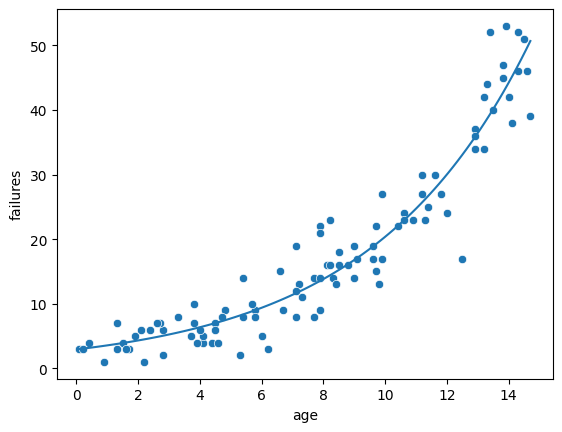

In [5]:
from ministats import plot_reg
plot_reg(pr2);